In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [2]:
def get_years_dfs(misinfotext_path: str, fakespeak_path: str):
    misinfotext_file = pd.ExcelFile(misinfotext_path)
    
    for year in misinfotext_file.sheet_names:
        df = pd.read_excel(misinfotext_file, sheet_name=year)
        df["year"] = year
        yield df
    
    fakespeak_file = pd.ExcelFile(fakespeak_path)
    
    for year in fakespeak_file.sheet_names:
        df = pd.read_excel(fakespeak_file, sheet_name=year)
        df["year"] = year
        yield df

def get_full_df(misinfotext_path: str, fakespeak_path: str):
    return pd.concat(get_years_dfs(misinfotext_path, fakespeak_path))

In [3]:
summary_cols = ["WC", "Analytic", "Clout", "Authentic", "Tone", "WPS", "BigWords", "Dic", "Linguistic"]

def get_summary_df(df: pd.DataFrame):
    return df.groupby("year")[summary_cols].mean()

In [4]:
def save_summary_plots(df: pd.DataFrame, graph_title: str, save_path: str):
    fig, axes = plt.subplots(
        nrows=3, ncols=3, 
        figsize=(18, 9), 
        squeeze=False)

    fig.suptitle(graph_title, fontsize=16)

    axes_flat: list[Axes] = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes_flat[i]
        ax.plot(df.index, df[col], marker="o")
        ax.set_title(col)
        ax.set_xlabel("year")
        ax.grid(True)
        ax.tick_params(axis="x", rotation=45)

    plt.tight_layout()

    plt.draw()
    plt.savefig(save_path)

    plt.show()

In [5]:
all_types_summary_df = get_summary_df(
    get_full_df(
        misinfotext_path="./data/MisInfoText/Analysis_output/MisInfoText_liwc.xlsx",
        fakespeak_path="./data/Fakespeak-ENG/Analysis_output/Fakespeak_liwc.xlsx"
    )
)
all_types_summary_df

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic
year,,,,,,,,,
2007,125.000000,97.240000,97.210000,2.420000,6.440000,25.000000,25.600000,84.800000,64.000000
2008,919.400000,87.388000,71.010000,7.608000,21.456000,21.730000,26.408000,80.806000,55.076000
2009,648.941176,84.165882,45.388235,26.257647,24.760000,23.154706,28.235882,84.844706,60.658235
2010,443.304348,82.992609,52.803478,22.998261,35.765455,20.226522,26.435652,81.612609,57.535217
2011,507.250000,83.552045,61.062273,26.005909,34.137500,22.592727,27.156136,83.483864,58.890455
2012,566.000000,87.317143,60.870357,19.583929,31.674286,21.365000,28.110357,83.452500,57.253214
2013,539.622951,79.440984,59.418833,28.647705,28.973036,19.276885,27.990328,83.361311,57.813770
2014,418.294118,82.773824,56.226667,26.218235,33.654242,21.054412,25.184412,82.224706,57.278529
2015,642.666667,77.941667,64.760000,34.138333,24.973333,21.276667,26.691667,86.331667,61.826667


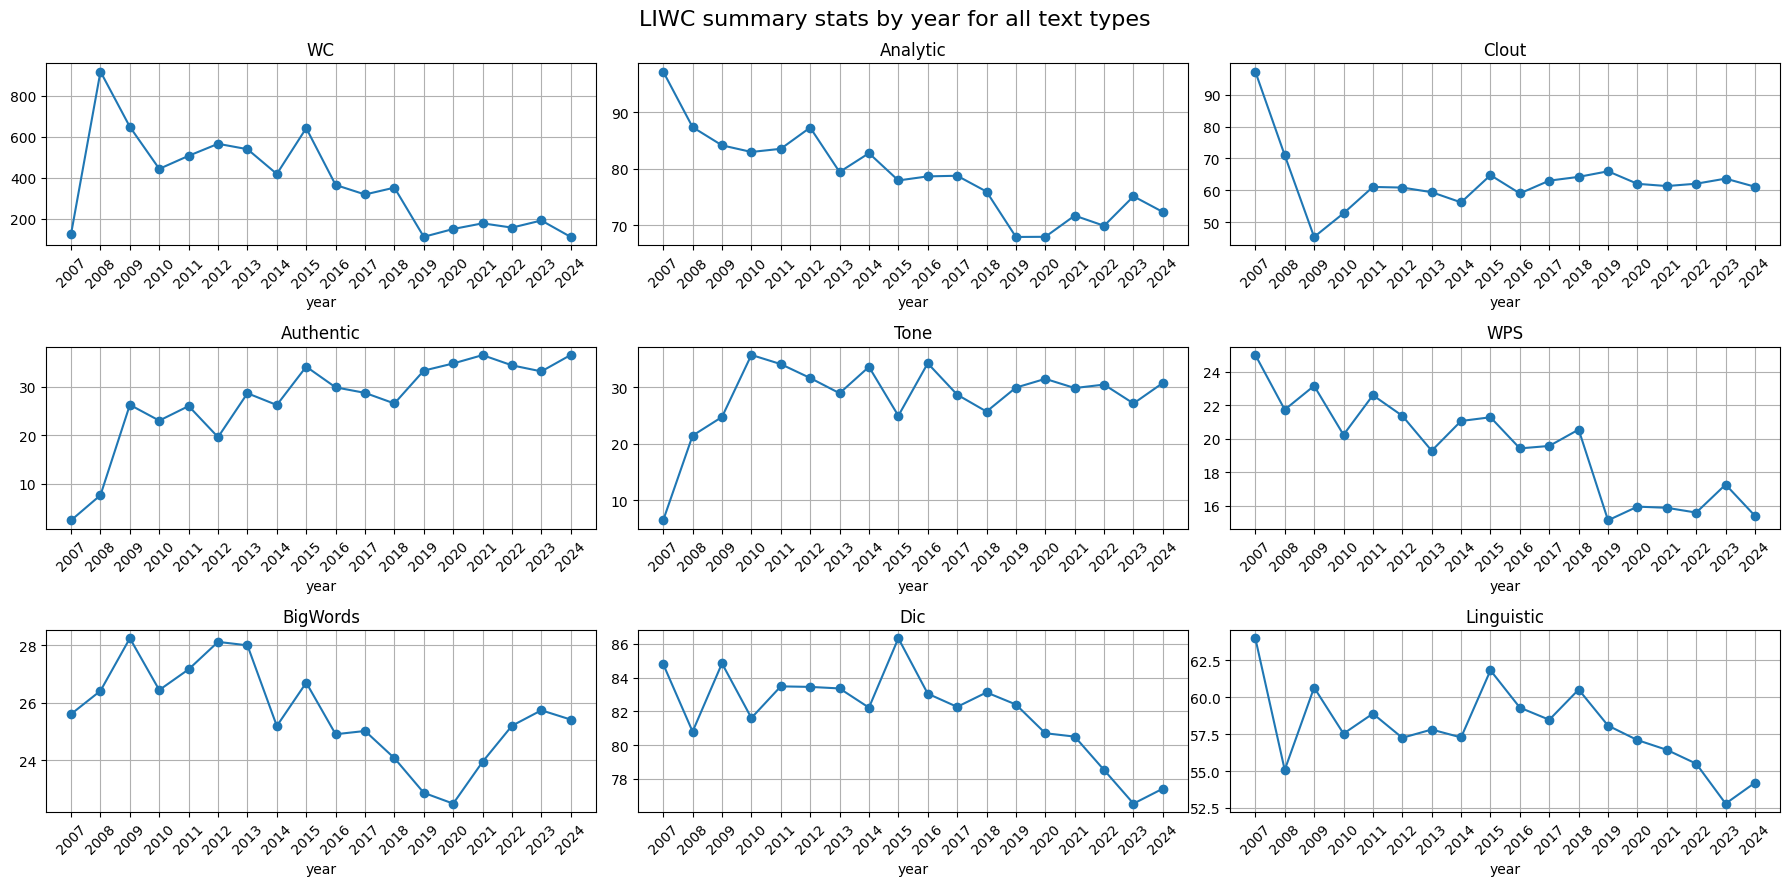

In [6]:
save_summary_plots(
    all_types_summary_df, 
    save_path="./visualization/LIWC/summary_all_types.png",
    graph_title="LIWC summary stats by year for all text types"
)

In [7]:
news_and_blog_summary_df = get_summary_df(
    get_full_df(
        misinfotext_path="./data/MisInfoText/Analysis_output/news_and_blog/MisInfoText_news_and_blog_liwc.xlsx",
        fakespeak_path="./data/Fakespeak-ENG/Analysis_output/news_and_blog/Fakespeak_news_and_blog_liwc.xlsx"
    )
)
news_and_blog_summary_df

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic
year,,,,,,,,,
2008,1008.666667,84.676667,75.336667,9.623333,15.873333,21.703333,26.730000,83.816667,58.360000
2009,668.454545,83.710909,43.484545,31.424545,20.069091,19.418182,26.130909,85.089091,61.930000
2010,605.214286,81.541429,54.364286,23.464286,29.737143,20.115714,25.130714,83.401429,59.597143
2011,579.518519,80.360000,59.994444,26.141481,36.873333,20.913704,26.464074,83.797037,60.003333
2012,669.125000,85.871250,57.796875,17.862500,30.340000,19.116250,28.431250,83.295000,58.353750
2013,798.264706,79.026471,60.822941,27.697647,26.607941,20.038235,26.268824,84.684412,60.817353
2014,546.294118,81.639412,53.987059,25.750588,24.892941,20.475294,24.756471,83.071176,60.098824
2015,642.666667,77.941667,64.760000,34.138333,24.973333,21.276667,26.691667,86.331667,61.826667
2016,597.553191,79.711915,60.611064,26.471702,29.669149,21.828936,25.271702,83.690426,60.271489


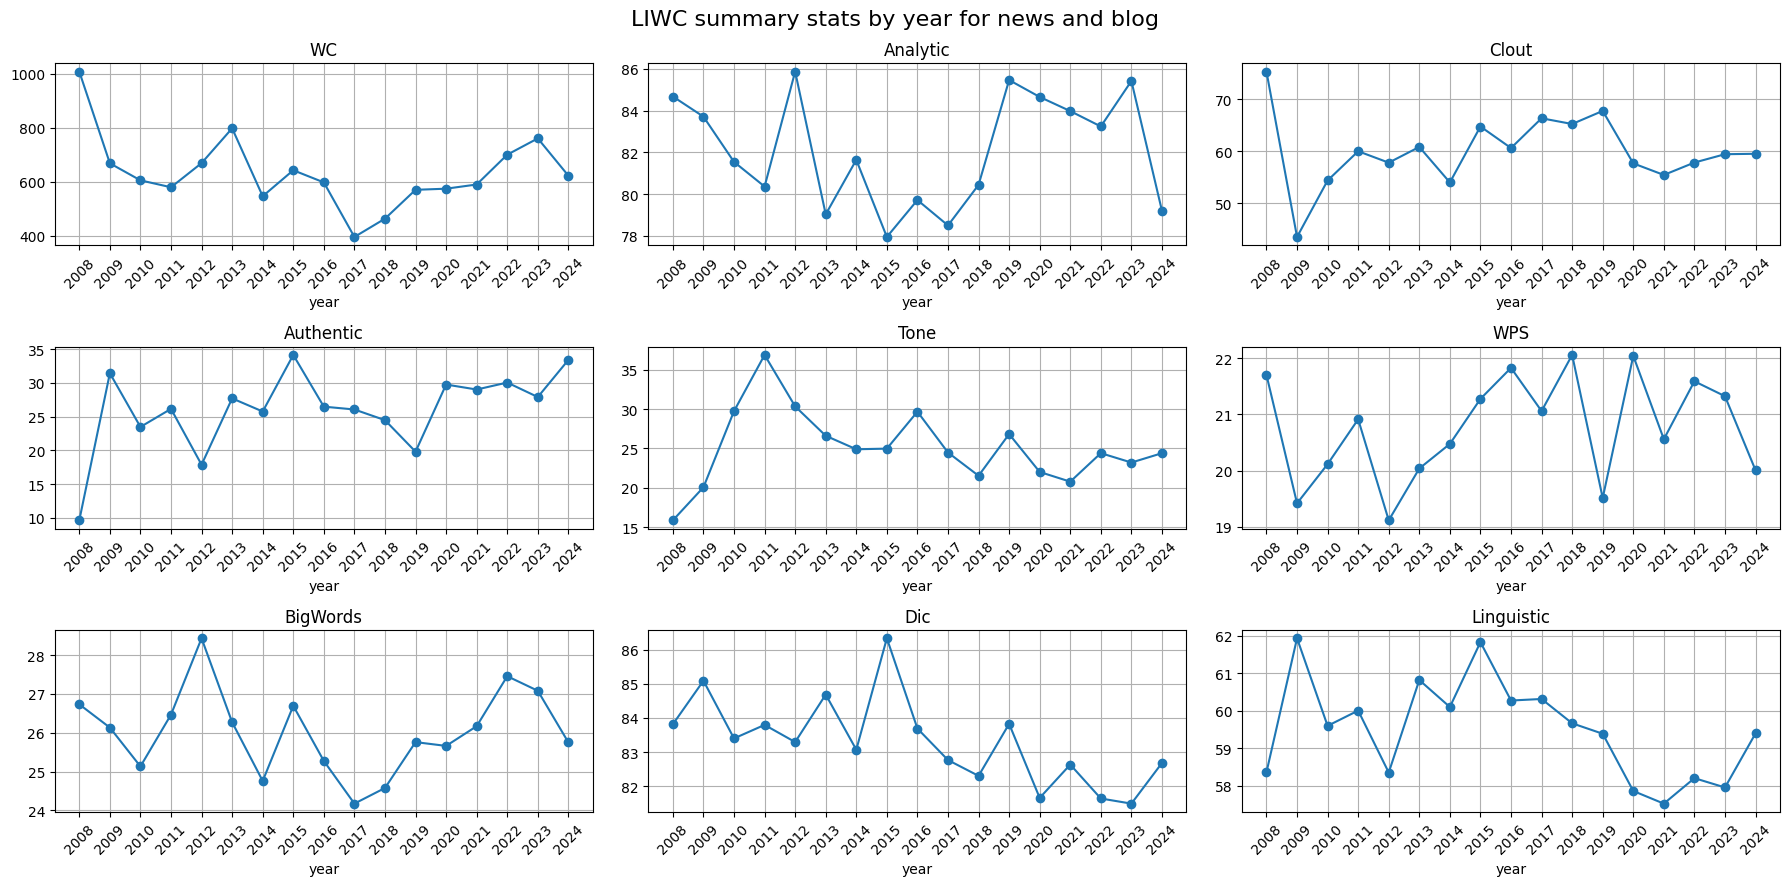

In [8]:
save_summary_plots(
    news_and_blog_summary_df, 
    save_path="./visualization/LIWC/summary_news_and_blog.png",
    graph_title="LIWC summary stats by year for news and blog")

In [9]:
press_release_summary_df = get_summary_df(
    get_full_df(
        misinfotext_path="./data/MisInfoText/Analysis_output/press_release/MisInfoText_press_release_liwc.xlsx",
        fakespeak_path="./data/Fakespeak-ENG/Analysis_output/press_release/Fakespeak_press_release_liwc.xlsx"
    )
)
press_release_summary_df

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic
year,,,,,,,,,
2007,125.000000,97.240000,97.210000,2.420000,6.440000,25.000000,25.600000,84.800000,64.000000
2008,785.500000,91.455000,64.520000,4.585000,29.830000,21.770000,25.925000,76.290000,50.150000
2009,531.600000,88.344000,48.896000,16.008000,28.792500,32.154000,32.932000,84.372000,58.180000
2010,214.750000,90.943750,56.547500,12.682500,46.315000,22.323750,27.023750,78.683750,53.618750
2011,392.470588,88.621765,62.758235,25.790588,29.792353,25.259412,28.255294,82.986471,57.122941
2012,428.500000,89.245000,64.968333,21.879167,33.453333,24.363333,27.682500,83.662500,55.785833
2013,318.411765,89.816471,62.606471,26.104118,40.720000,23.191765,30.562941,81.605882,55.537647
2014,429.090909,88.720000,59.683636,21.903636,31.475455,24.835455,29.093636,81.462727,53.409091
2016,290.571429,83.272143,60.850000,18.943571,32.749286,22.544286,29.575714,79.221429,54.169286


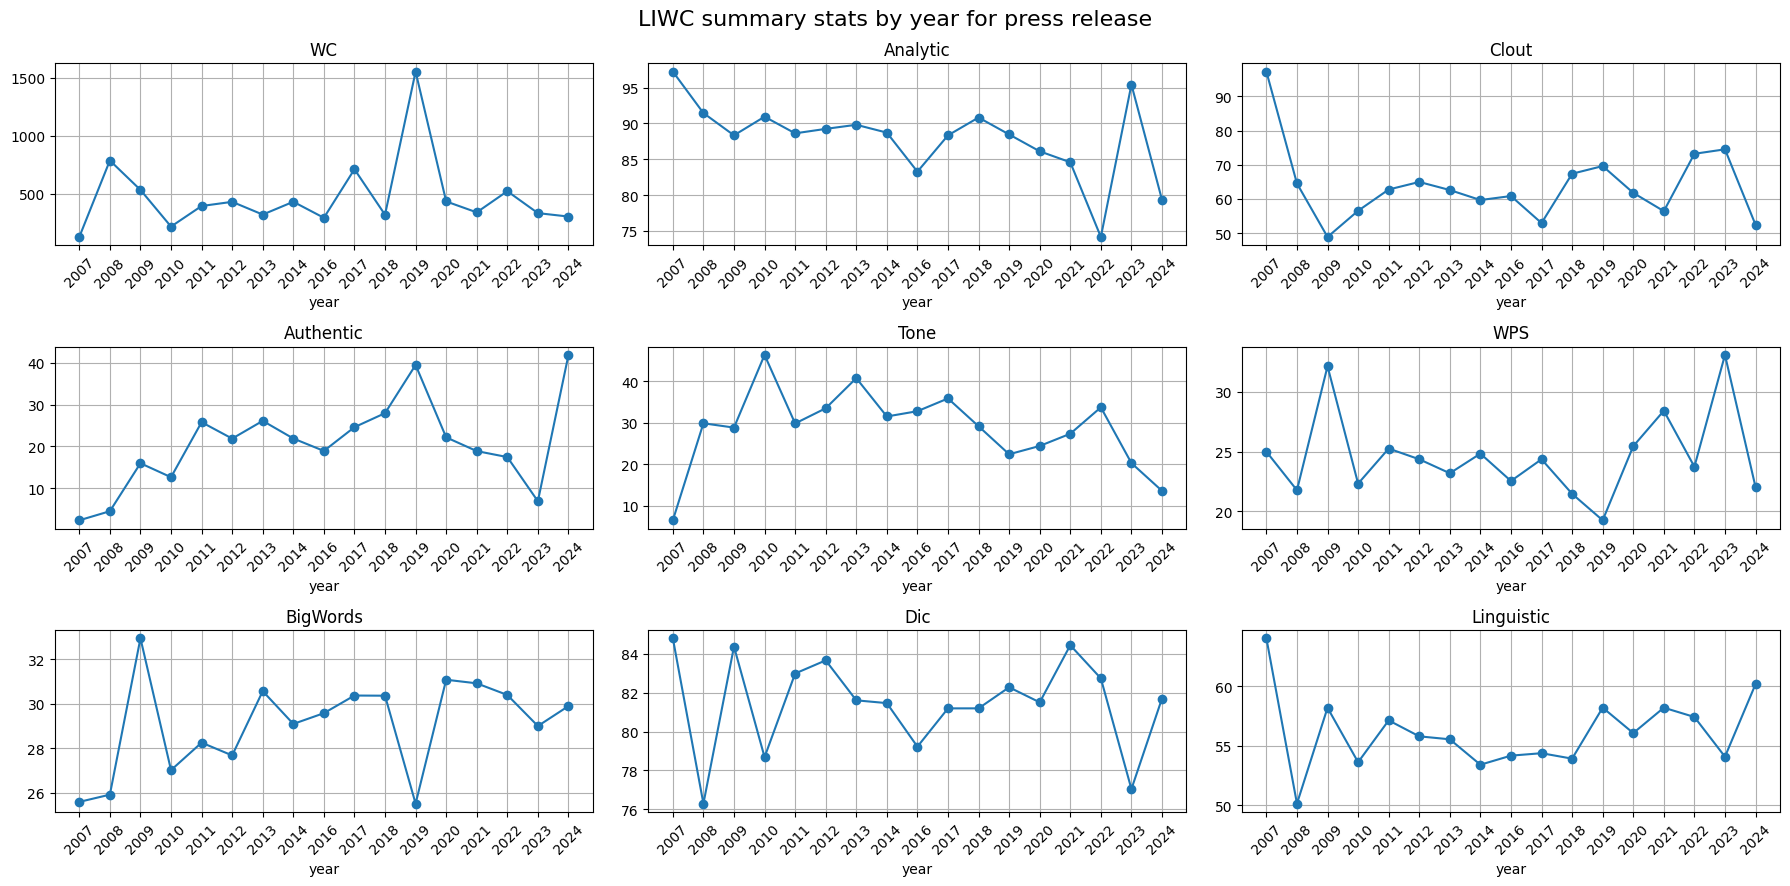

In [10]:
save_summary_plots(
    press_release_summary_df, 
    save_path="./visualization/LIWC/summary_press_release.png",
    graph_title="LIWC summary stats by year for press release"
)

In [11]:
social_media_summary_df = get_summary_df(
    get_full_df(
        misinfotext_path="./data/MisInfoText/Analysis_output/social_media/MisInfoText_social_media_liwc.xlsx",
        fakespeak_path="./data/Fakespeak-ENG/Analysis_output/social_media/Fakespeak_social_media_liwc.xlsx"
    )
)
social_media_summary_df

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic
year,,,,,,,,,
2009,1021.000000,68.280000,48.790000,20.670000,60.230000,19.260000,27.910000,84.520000,59.060000
2010,5.000000,39.700000,1.000000,99.000000,NaN,5.000000,40.000000,80.000000,60.000000
2013,36.300000,63.212000,48.093333,36.202000,5.116000,10.033000,29.470000,81.847000,51.471000
2014,35.833333,75.086667,56.236000,35.453333,68.236000,15.763333,19.230000,81.223333,56.381667
2016,33.966667,74.867667,55.352593,40.635862,44.641304,14.178333,22.132000,83.835000,60.168333
2017,42.861538,76.729385,58.008750,35.629538,39.474884,15.008462,25.337231,81.496462,55.656000
2018,43.366667,59.824333,60.575000,32.061000,37.888889,16.026000,21.159333,85.895667,64.497667
2019,54.861538,66.312752,65.776627,34.253520,30.427760,14.736923,22.609538,82.307731,57.980462
2020,71.640123,64.815787,62.914495,35.853631,34.220676,14.769342,21.839541,80.534028,56.976539


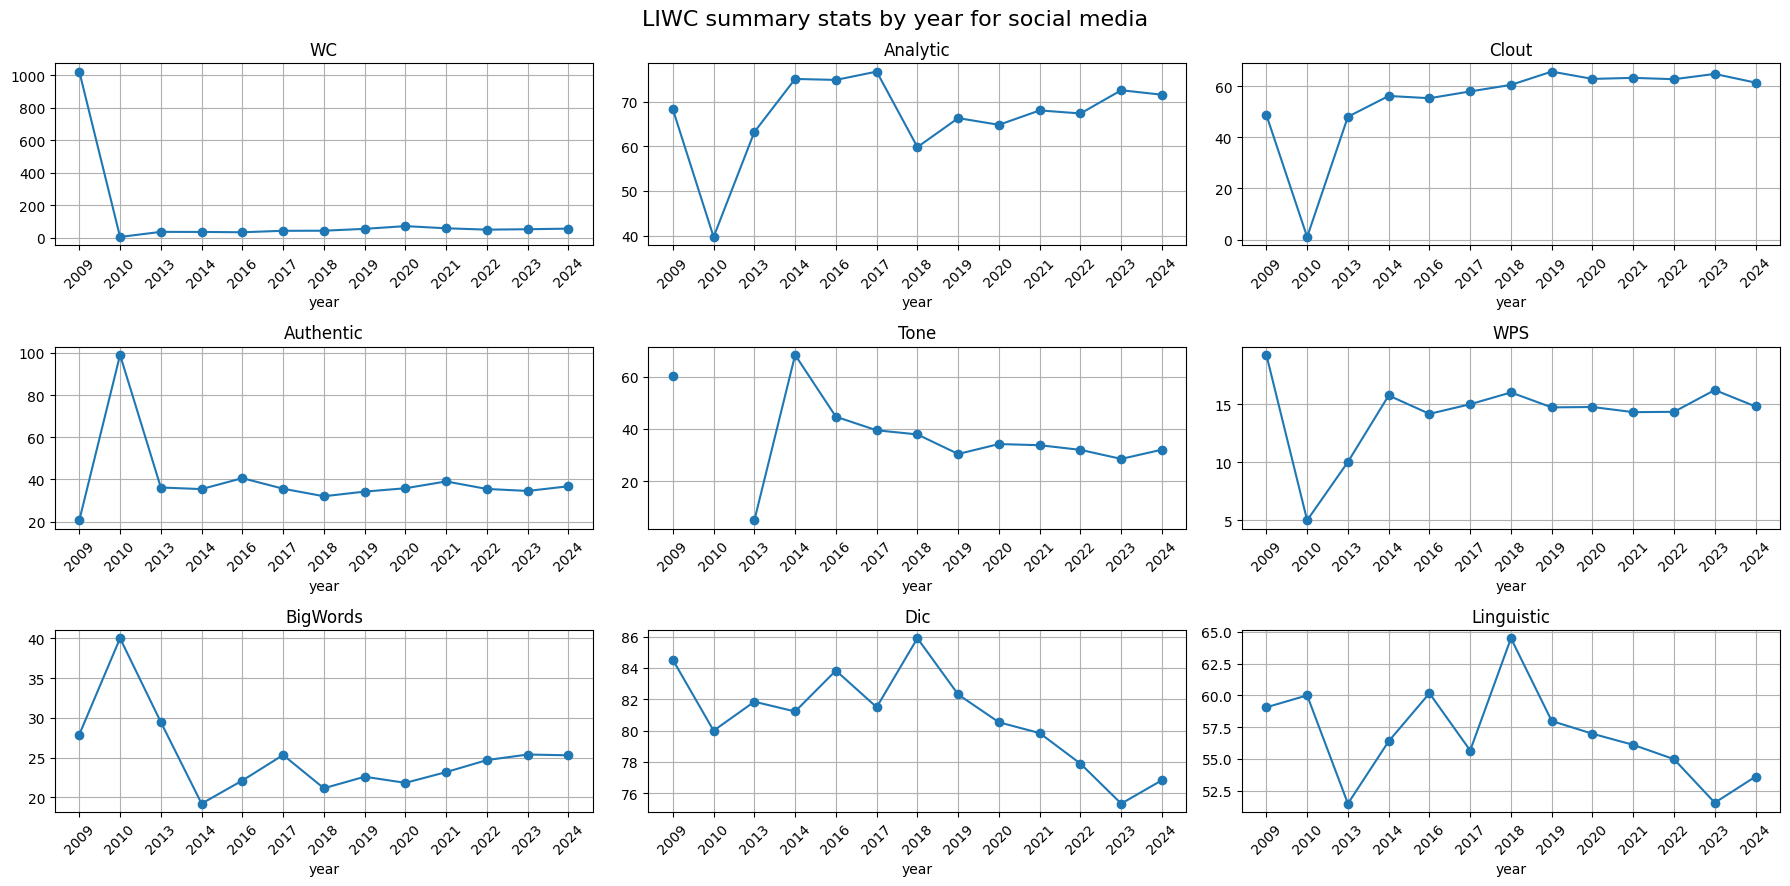

In [12]:
save_summary_plots(
    social_media_summary_df, 
    save_path="./visualization/LIWC/summary_social_media.png",
    graph_title="LIWC summary stats by year for social media"
)